# T1 - Getting started

Installing and getting started with FPsim is quite simple. 

To install, just type `pip install fpsim`. If it worked, you should be able to import FPsim with `import fpsim as fp`.

The basic design philosophy of FPsim is: **common tasks should be simple**. For example:

- Defining parameters
- Running a simulation
- Plotting results

This tutorial walks you through how to define parameters and run the simulation. The next tutorial will show you how to plot the results of a simulation.

## Hello world

To create, run, and plot a sim with default options is just:

  Running 1960 of 2020 ( 0/721) (0.13 s)  ———————————————————— 0%
  Running 1961 of 2020 (12/721) (0.37 s)  ———————————————————— 2%
  Running 1962 of 2020 (24/721) (0.57 s)  ———————————————————— 3%
  Running 1963 of 2020 (36/721) (0.78 s)  •——————————————————— 5%
  Running 1964 of 2020 (48/721) (0.99 s)  •——————————————————— 7%
  Running 1965 of 2020 (60/721) (1.18 s)  •——————————————————— 8%
  Running 1966 of 2020 (72/721) (1.40 s)  ••—————————————————— 10%
  Running 1967 of 2020 (84/721) (1.59 s)  ••—————————————————— 12%
  Running 1968 of 2020 (96/721) (1.78 s)  ••—————————————————— 13%
  Running 1969 of 2020 (108/721) (2.00 s)  •••————————————————— 15%
  Running 1970 of 2020 (120/721) (2.19 s)  •••————————————————— 17%
  Running 1971 of 2020 (132/721) (2.36 s)  •••————————————————— 18%
  Running 1972 of 2020 (144/721) (2.54 s)  ••••———————————————— 20%
  Running 1973 of 2020 (156/721) (2.73 s)  ••••———————————————— 22%
  Running 1974 of 2020 (168/721) (2.88 s)  ••••————————————————

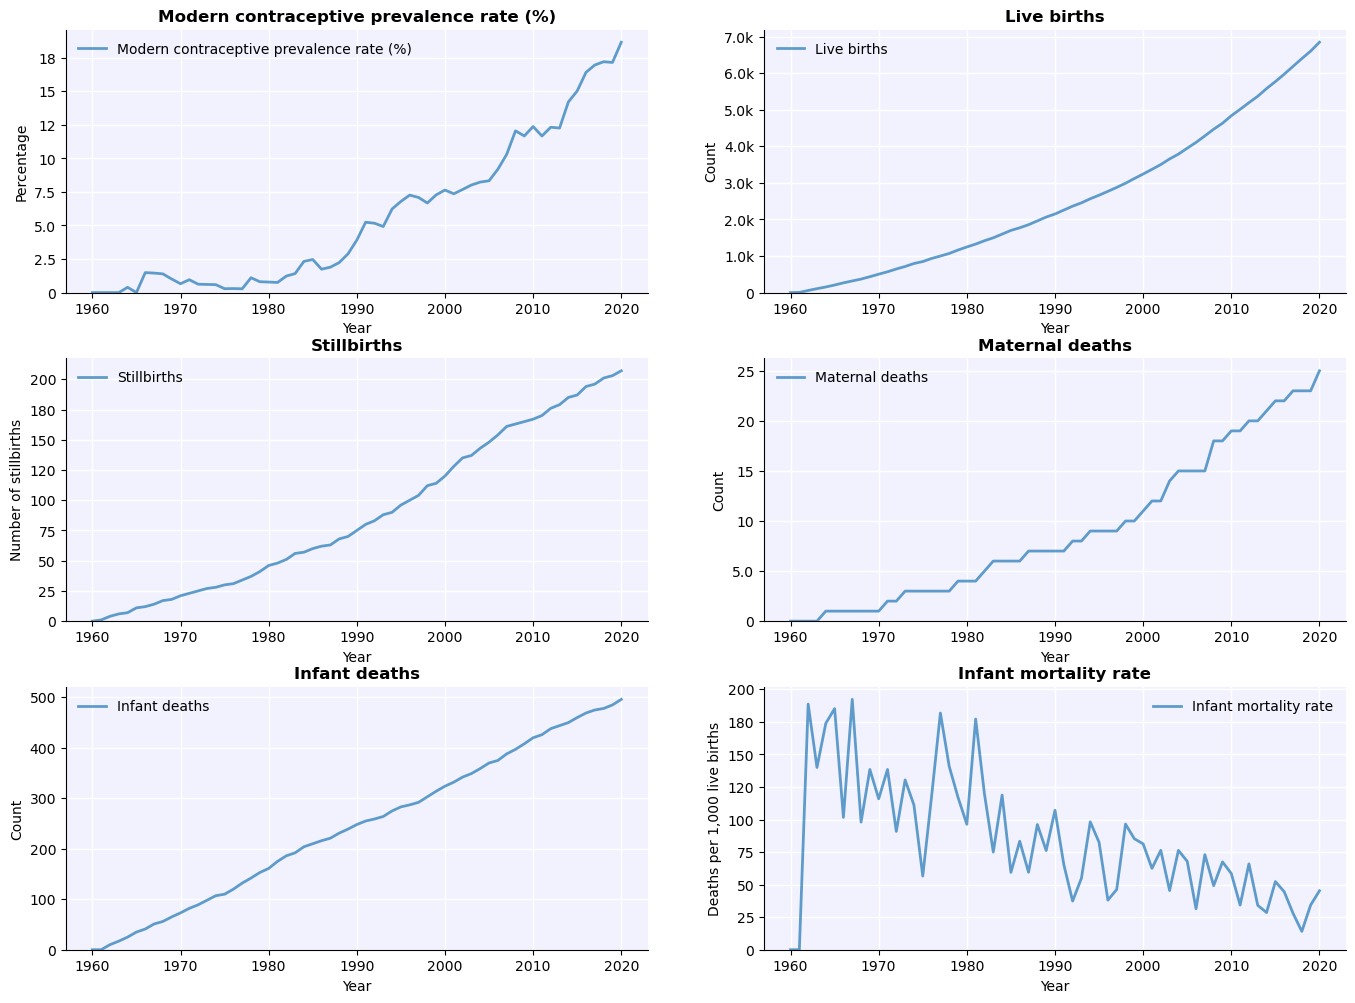

In [1]:
import fpsim as fp

sim = fp.Sim()
sim.run()
fig = sim.plot()

## Defining parameters and running simulations

Parameters are defined as a dictionary.
In FPsim, we categorize our parameters as:

* Basic parameters <br> 
* Age limits <br>
* Durations<br>
* Pregnancy outcomes<br>
* Fecundity and exposure<br>
* MCPR<br>

The most common category of parameters to change in FPsim is the basic category, which includes the location (i.e. Senegal, northern India), the starting population, the starting year, and the initial number of agents. We can define thiese as: 

In [ ]:
pars = dict(
    n_agents   = 10_000,
    location   = 'senegal',
    start_year = 1960, 
    end_year   = 2020,
)

Running a simulation is pretty easy. In fact, running a sim with the parameters we defined above is just:

In [ ]:
sim = fp.Sim(pars)
sim.run()

This will generate a results dictionary `sim.results`. For example, the number of pregnancies in the sim can be found using `sim.results['pregnancies']`.

Rather than creating a parameter dictionary, any valid parameter can also be passed to the sim directly. For example, exactly equivalent to the above is:

In [ ]:
sim = fp.Sim(n_agents=10e3, location='senegal', start_year=1960, end_year=2020)
sim.run()

You can mix and match too – pass in a parameter dictionary with default options, and then include other parameters as keywords (including overrides; keyword arguments take precedence). For example:

In [ ]:
sim = fp.Sim(pars, n_agents=100) # Use parameters defined above, except start with 100 agents instead of 10,000
sim.run()

Now you know how to run a basic simulation in FPsim and change the parameters. Now let's take a look at the output of the sim.

### Explore plotting options for a single sim

Let's take a look at the basic suite of plotting options, once we've run our initial simulation.

The basic plot function will plot births, deaths, and mcpr over the entire simulation.

There are also pre-defined options that combine similar types of output. For instance, 'apo' stands for adverse pregnancy outcomes, and will plot infant deaths, stillbirths, and abortions.

plot() will take any of the following options:

* <i>'cpr'</i> will plot three different ways to define contraceptive prevalence - mCPR, CPR (includes traditional), and aCPR (includes traditional and restricts denominator to sexually active non-pregnant women) <br>
* <i>'apo'</i> will plot adverse pregnancy outcomes, including abortion and miscarriage <br>
* <i>'mortality'</i> will plot mortality-related outcomes <br>
* <i>'method'</i> plots the method mix over time  <br>

In [ ]:
sim.plot() # the default
sim.plot('cpr')

In the next tutorial, you'll learn how to build intervention scenarios using multiple sims and plot those. 